# Hvor er kartet???

Ekte "geoit"-nerder som lager eksempler uten kart? 

Dette feltet er i rivende utvikling, og det er et villniss av oppskrifter på 
hvordan du kan få kartfunksjon i notisblokka di, eller med integrasjon mot en 
standalone html-kartklient. Noen av disse krever at du klipper og limer store 
mengder javascript inn i notisblokka, eller kompleks redigering av jupyters 
oppstartfiler. 

Biblioteket **[mplleaflet](https://github.com/jwass/mplleaflet)** var av de 
enkleste jeg fant i farten. Standardoppsettet er med open streetmap kartbakgrunn 
(endrbart, men det har jeg ikke brukt tid på). 

```

import matplotlib as plt
import mppleaflet
# ... Gjør den plottingen du ønsker med matplotlib ... 

mplleaflet.display( ) # Kart integrert i notebook

# eller ... 
mplleaflet.show()     # Åpne nytt nettleser-vindu
```

# Kjør først analysen

Vi kjører de samme analysene som i _Geopandas-nvdb-eksempel.ipynb_, men i en 
nedstrippet versjon uten grafikk, visning av kolonner etc. 

In [1]:
%matplotlib inline

%run ./Geopandas-nvdb-eks-kunpython.py

C:\Users\jajens\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2652: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


Antall segmenter med turistveger 527
Antall tettsteder 990
Tettsteder med turistveger 120 Med  DUPLIKATER?
Turistveger som går gjennom tettsteder 120
Tettsteder med turistveger 44 UTEN duplikater
Antall ulykker på turistveger {'antall': 4078, 'strekningslengde': 0}
649 ulykker på turistveger gjennom tettsteder
40 tettsteder har turistveger med ulykker
Datadump CRS {'init': 'epsg:4326'} ulykker CRS {'init': 'epsg:25833'}


## Plotte først! 

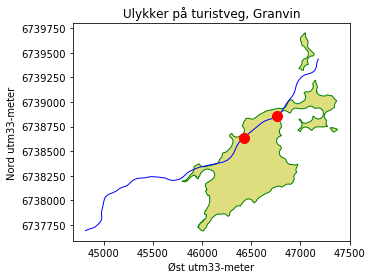

In [2]:
import matplotlib.pyplot as plt
import mplleaflet

fig1, ax1 = plt.subplots()

ax1.set_title( "Ulykker på turistveg, " + vistettsted)
ax1.set_ylabel( 'Nord utm33-meter')
ax1.set_xlabel( 'Øst utm33-meter')
ax1.set_aspect('equal')

tettsted_m_turistveg_ulykker[ tettsted_m_turistveg_ulykker.Tettstedsn == 
        vistettsted ].geometry.plot( ax=ax1, color='y', edgecolor='g')

turist_i_tettsted[ turist_i_tettsted.Tettstedsn == 
                  vistettsted].geometry.plot( ax=ax1, color='b');

ulykker_i_tettsted[ ulykker_i_tettsted.Tettstedsn == 
                vistettsted].geometry.plot( ax=ax1, color='r', markersize = 10);

## Så lager vi kart!

In [3]:
crs_out = {'init': 'epsg:25833'}

mplleaflet.display( fig1, crs=crs_out)

# Bruk versjonen under for å åpne kartet i et nytt nettleservindu
# mplleaflet.show( fig1, crs=crs_out)

Github er god på å vise fram notebooks - men vil ikke rendre kartet i cellen over her. Når du kjører dette i notisblokka skal det se noe slik ut: 


![Skjermdump av hvordan kartet ser ut i notebook](./figures/kartskjermdump.png "Slik skal det se ut i notisboka di")


# Stand-alone HTML

Kommandoen ```mplleaflet.show()``` lager en stand-alone html-fil med data og styling. Kartbakgrunn hentes fra OpenStreetMap (konfigurerbart). 

[Se kartet live](https://ltglahn.github.io/geopandas_ssb_nvdb_demo/mplleaflet-standalone-kart.html) og se [kildekoden](https://github.com/LtGlahn/geopandas_ssb_nvdb_demo/blob/master/mplleaflet-standalone-kart.html)